## Import Libraries

In [228]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error

## Data Exploration

In [229]:
house_train = pd.read_csv('train.csv')
house_test = pd.read_csv('test.csv')
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [230]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [231]:
house_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Fill missing values

In [232]:
# Drop columns where we have very minimal data
house_train = house_train.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])
house_test = house_test.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])

In [233]:
# Missing values in house_train

for col in house_train.columns:
    
    # Replace numeric values by median
    if (type(house_train[col][0]) == np.float64) or (type(house_train[col][0]) == np.int64): 
        med = house_train[col].median()
        house_train[col].fillna(med, inplace=True)

    # Replace categorical values by mode
    else:
        mode = house_train[col].mode().iloc[0]
        house_train[col].fillna(mode, inplace=True)

In [234]:
# Missing values in house_test

for col in house_test.columns:
    
    # Replace numeric values by median
    if (type(house_test[col][0]) == np.float64) or (type(house_test[col][0]) == np.int64): 
        med = house_test[col].median()
        house_test[col].fillna(med, inplace=True)

    # Replace categorical values by mode
    else:
        mode = house_test[col].mode().iloc[0]
        house_test[col].fillna(mode, inplace=True)

In [235]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Exploratory Data Analysis

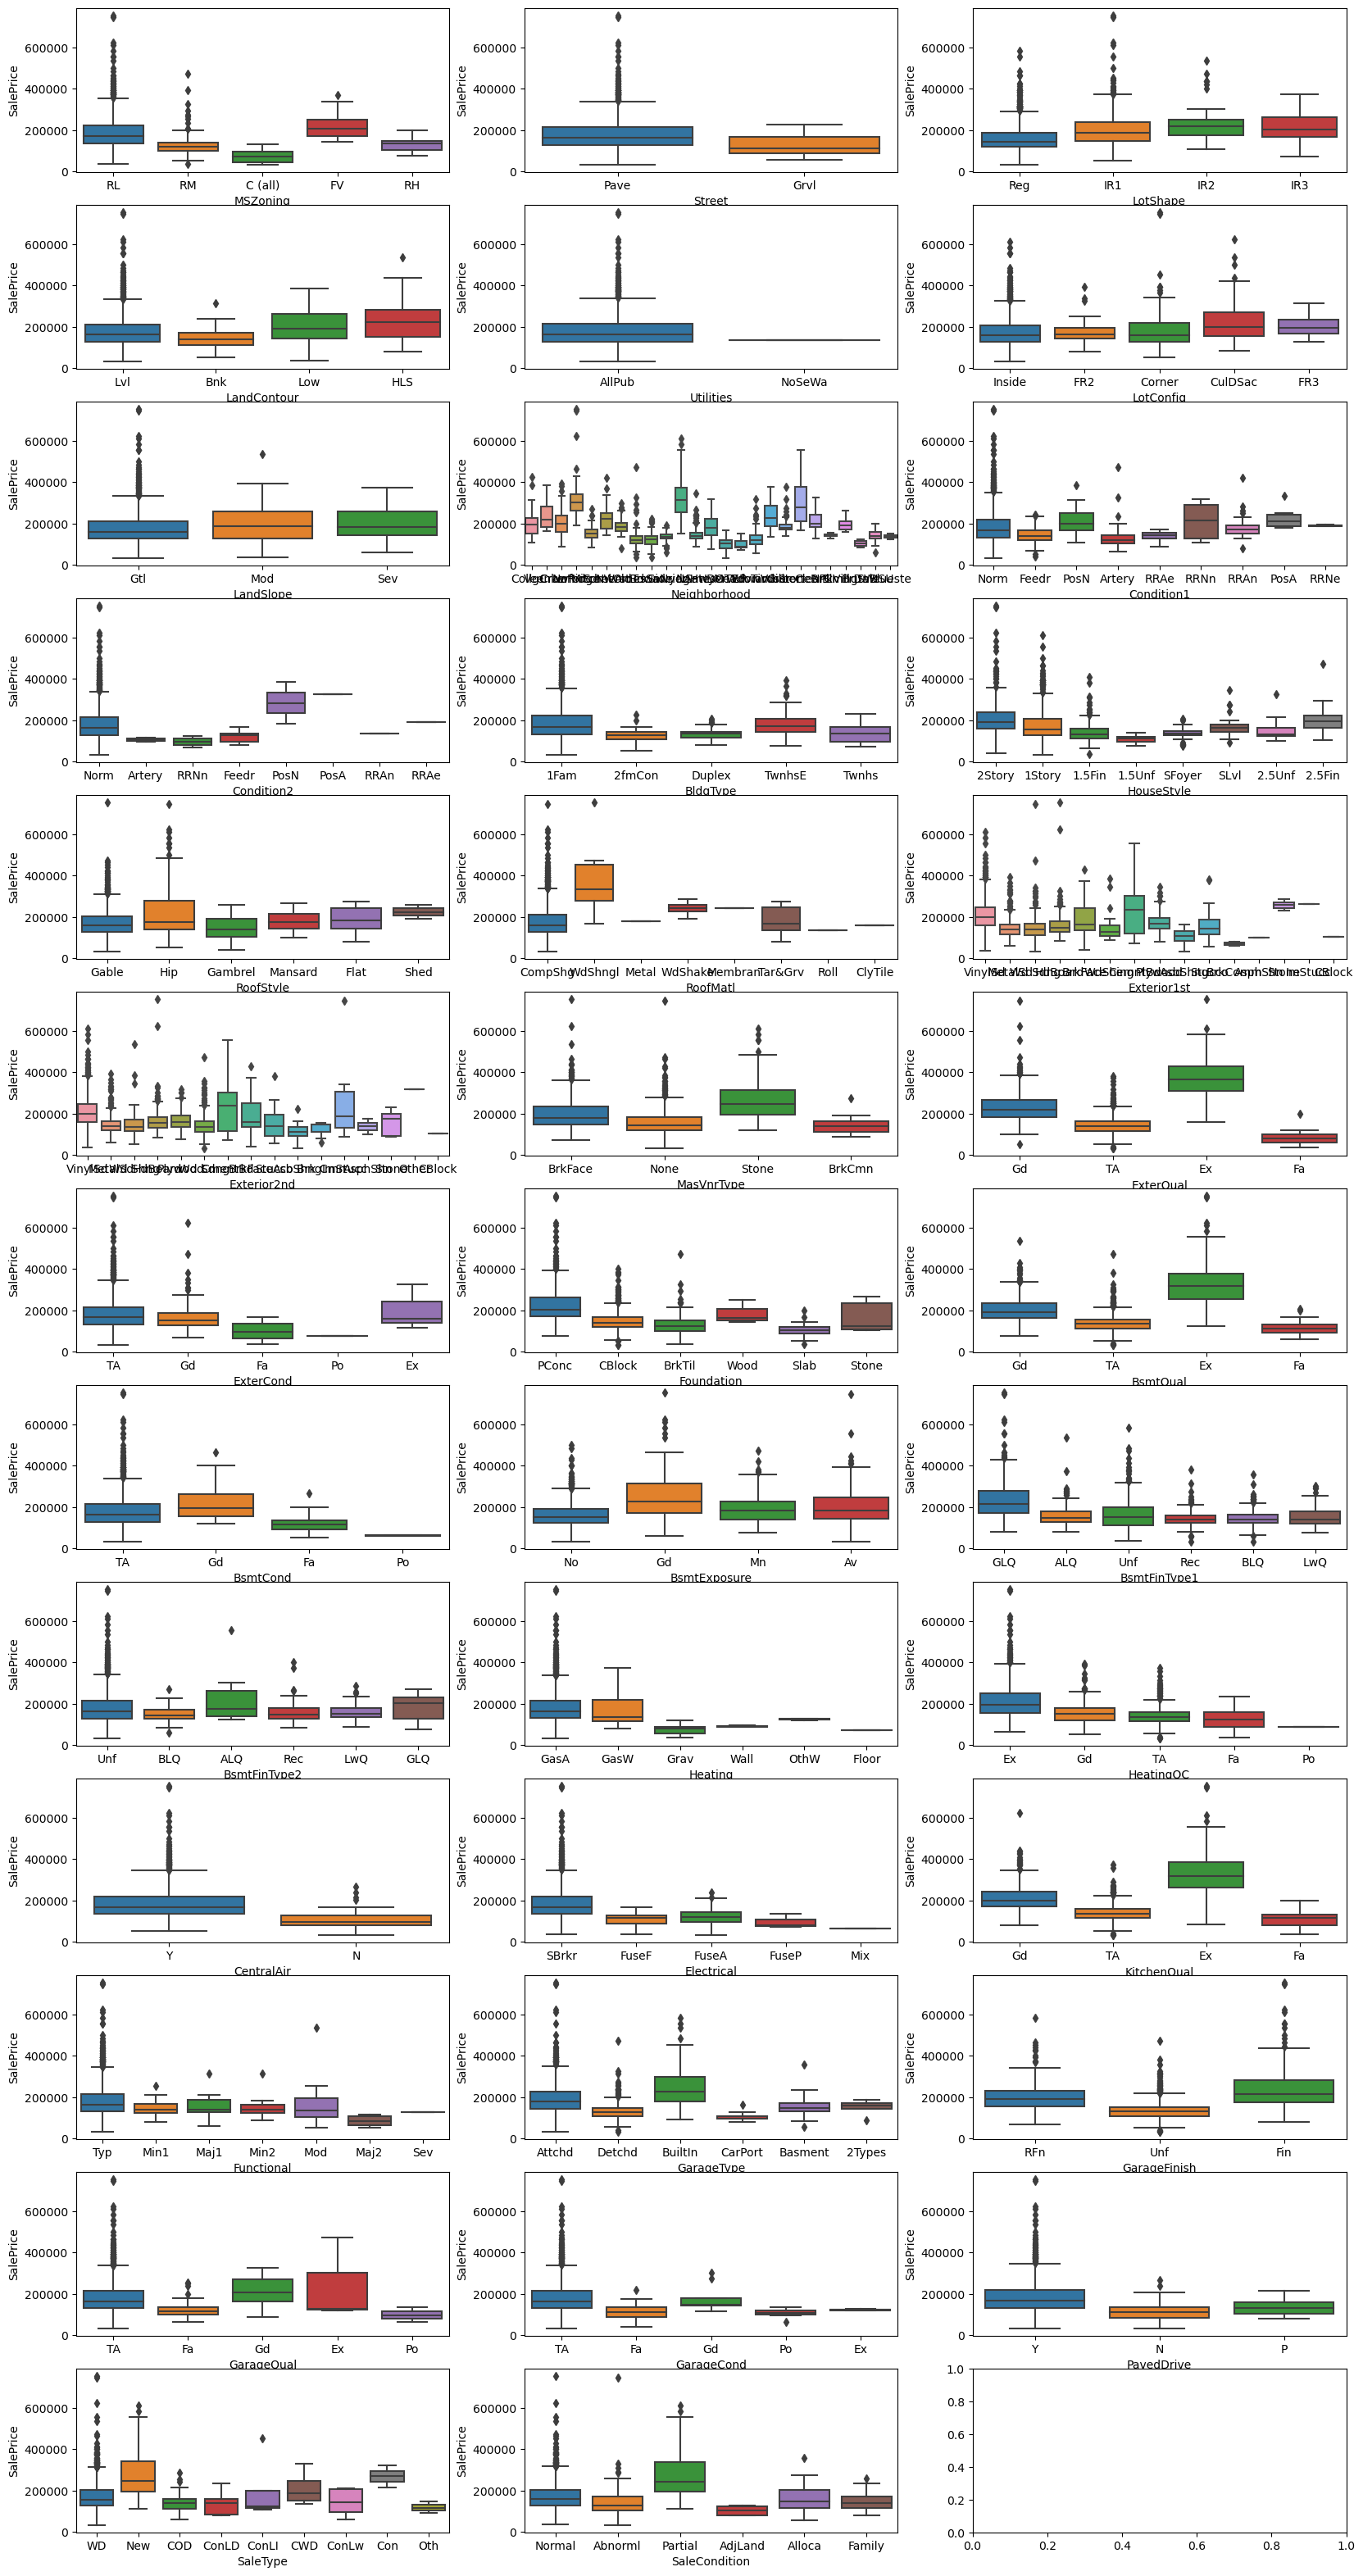

In [236]:
#Boxplot for all the categorical variables 

# Define the number of rows and columns for the grid
rows = 13
cols = 3

# Create a list of all categorical variable names
categorical_vars = house_train.select_dtypes(include='object').columns.tolist()

# Create a new figure and axis objects
fig, axes = plt.subplots(rows, cols, figsize=(20, 40))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the categorical variables and create boxplots in the grid
for i, var in enumerate(categorical_vars):
    sns.boxplot(x=var, y='SalePrice', data=house_train, ax=axes[i])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('SalePrice')

In [237]:
# Remove categorical variables that do not seem to have an effect on sale price
house_train = house_train.drop(columns=['Street', 'Utilities', 'LotConfig', 'LandSlope'])
house_test = house_test.drop(columns=['Street', 'Utilities', 'LotConfig', 'LandSlope'])

<AxesSubplot:>

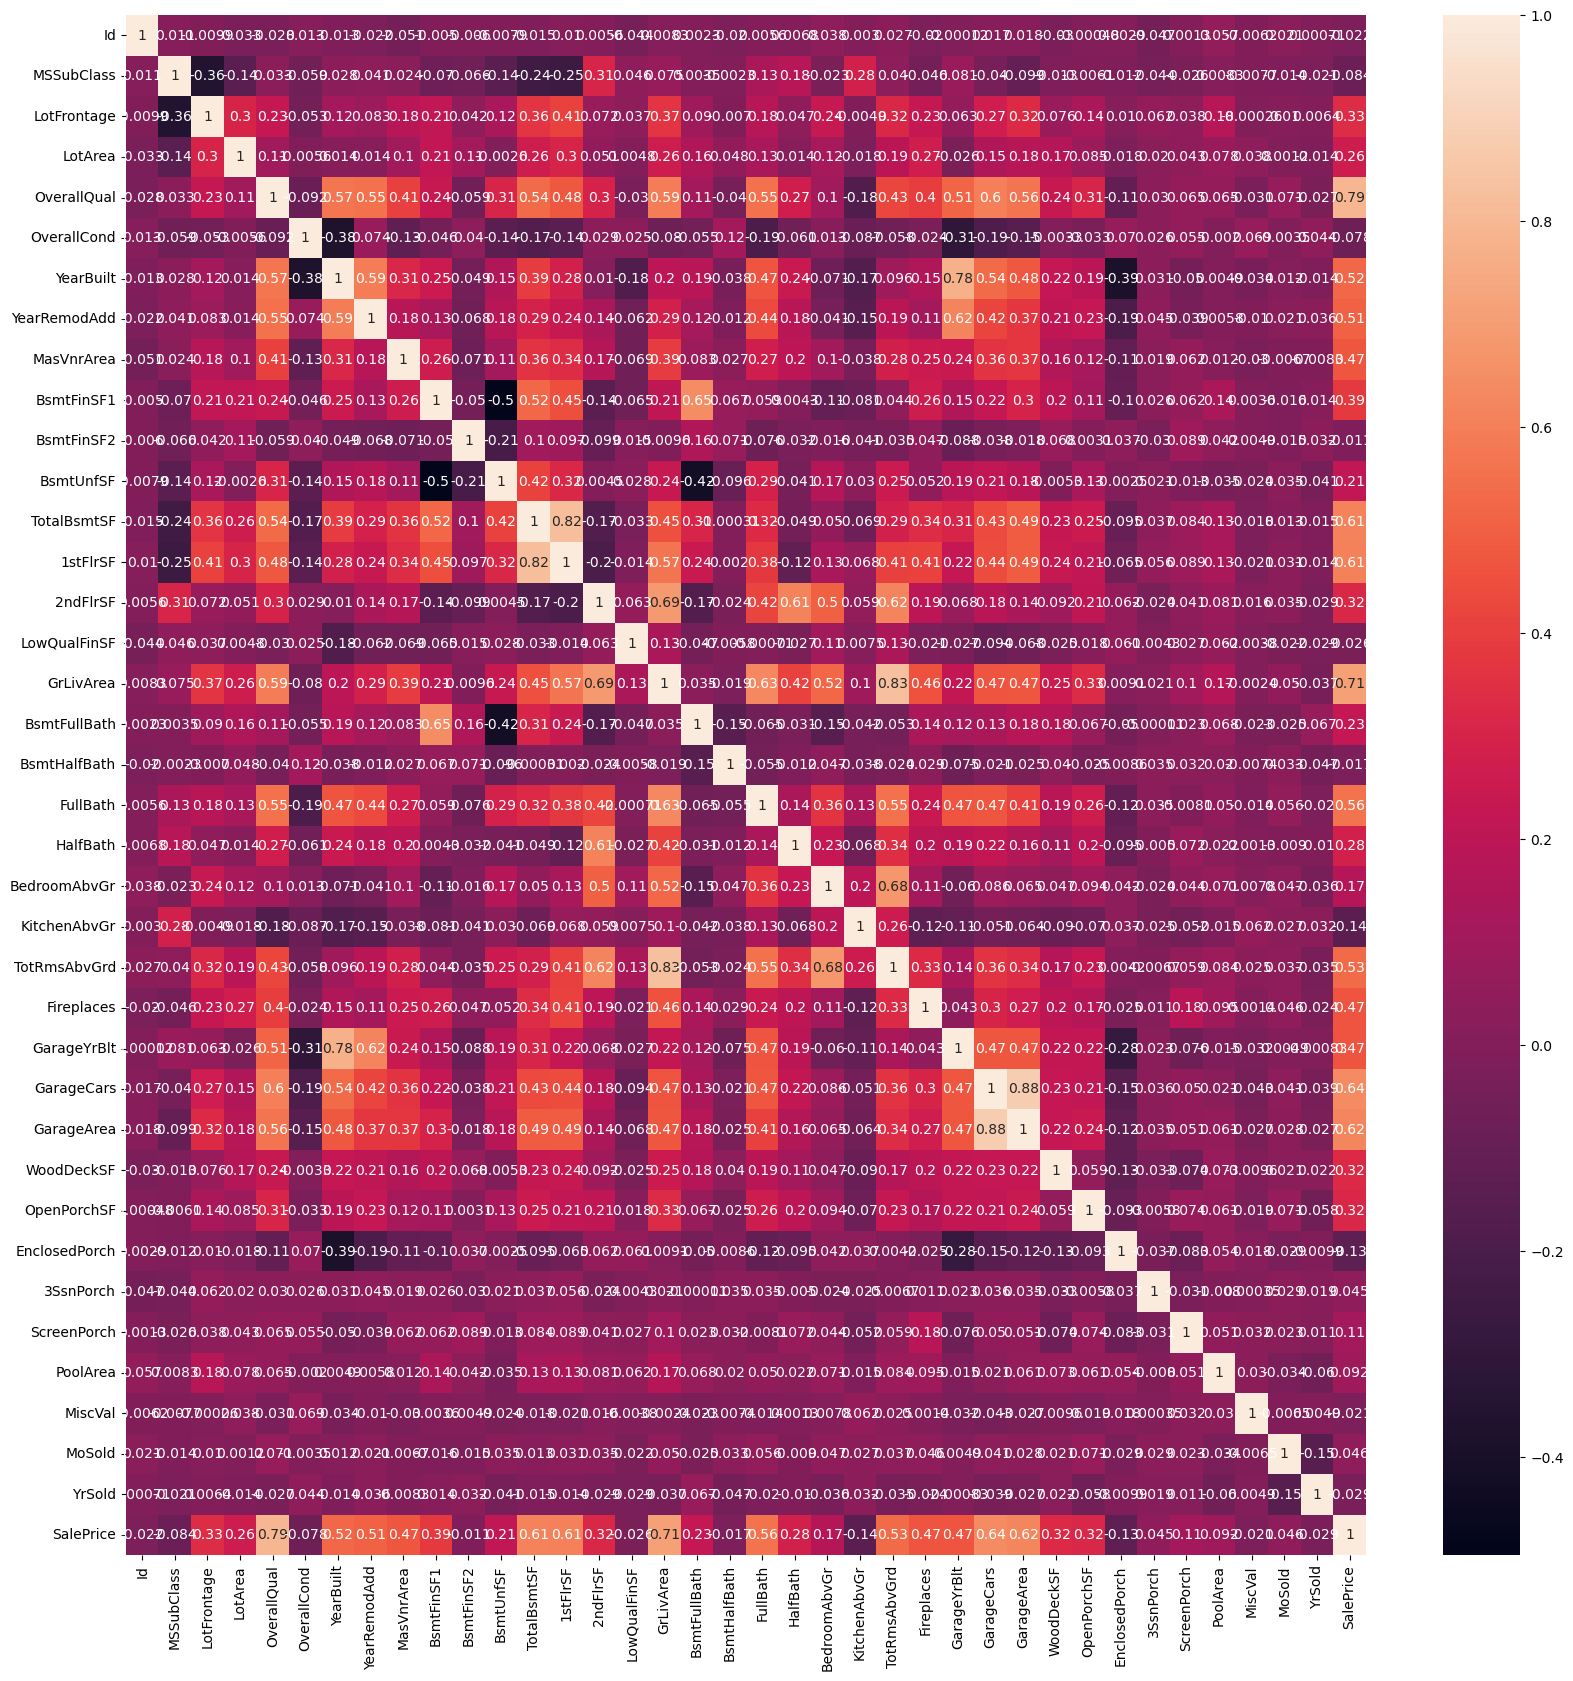

In [238]:
# Check for correlations between numeric features
corrmat= house_train.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True)

In [239]:
# Remove features that are highly correlated with each other
house_train = house_train.drop(columns=['GrLivArea', 'TotalBsmtSF', 'GarageYrBlt', 'GarageCars'])
house_test = house_test.drop(columns=['GrLivArea', 'TotalBsmtSF', 'GarageYrBlt', 'GarageCars'])

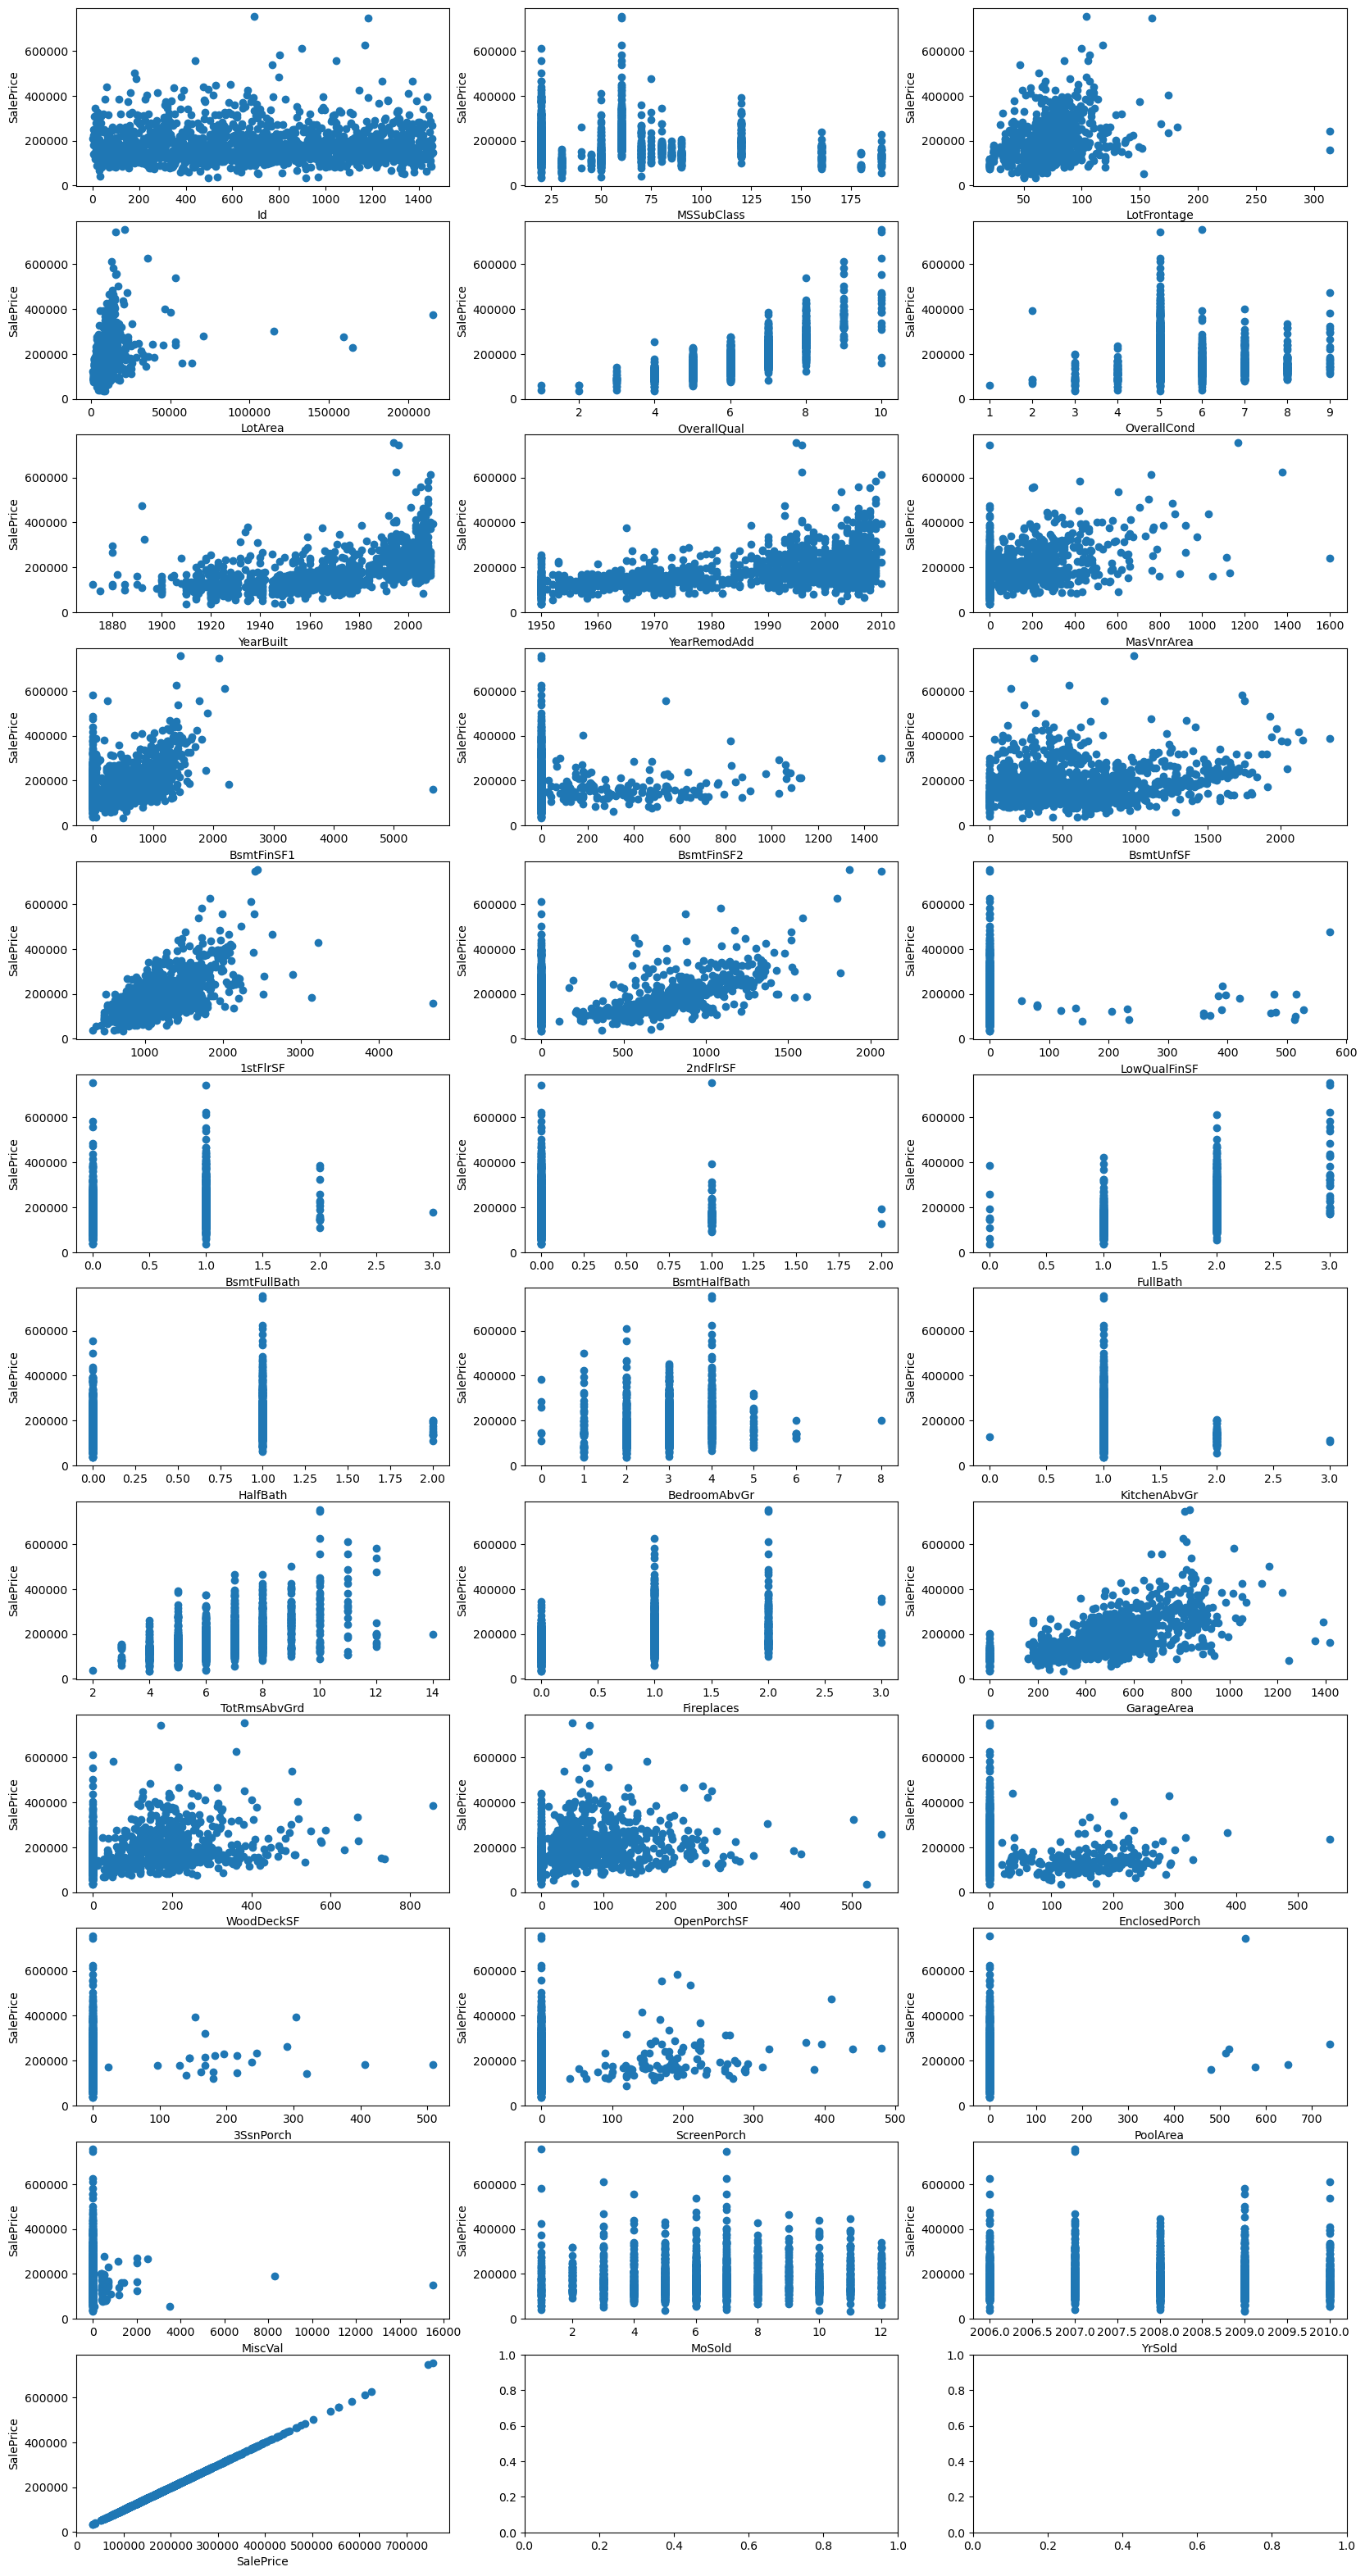

In [240]:
#Scatter plot for all the numeric variables 

# Define the number of rows and columns for the grid
rows = 12
cols = 3

# Create a list of all numeric variable names
num_vars = house_train.select_dtypes(exclude='object').columns.tolist()

# Create a new figure and axis objects
fig, axes = plt.subplots(rows, cols, figsize=(20, 40))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the numerical variables and create scatterplots in the grid
for i, var in enumerate(num_vars):
    axes[i].scatter(house_train[var].values, house_train['SalePrice'].values)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('SalePrice')

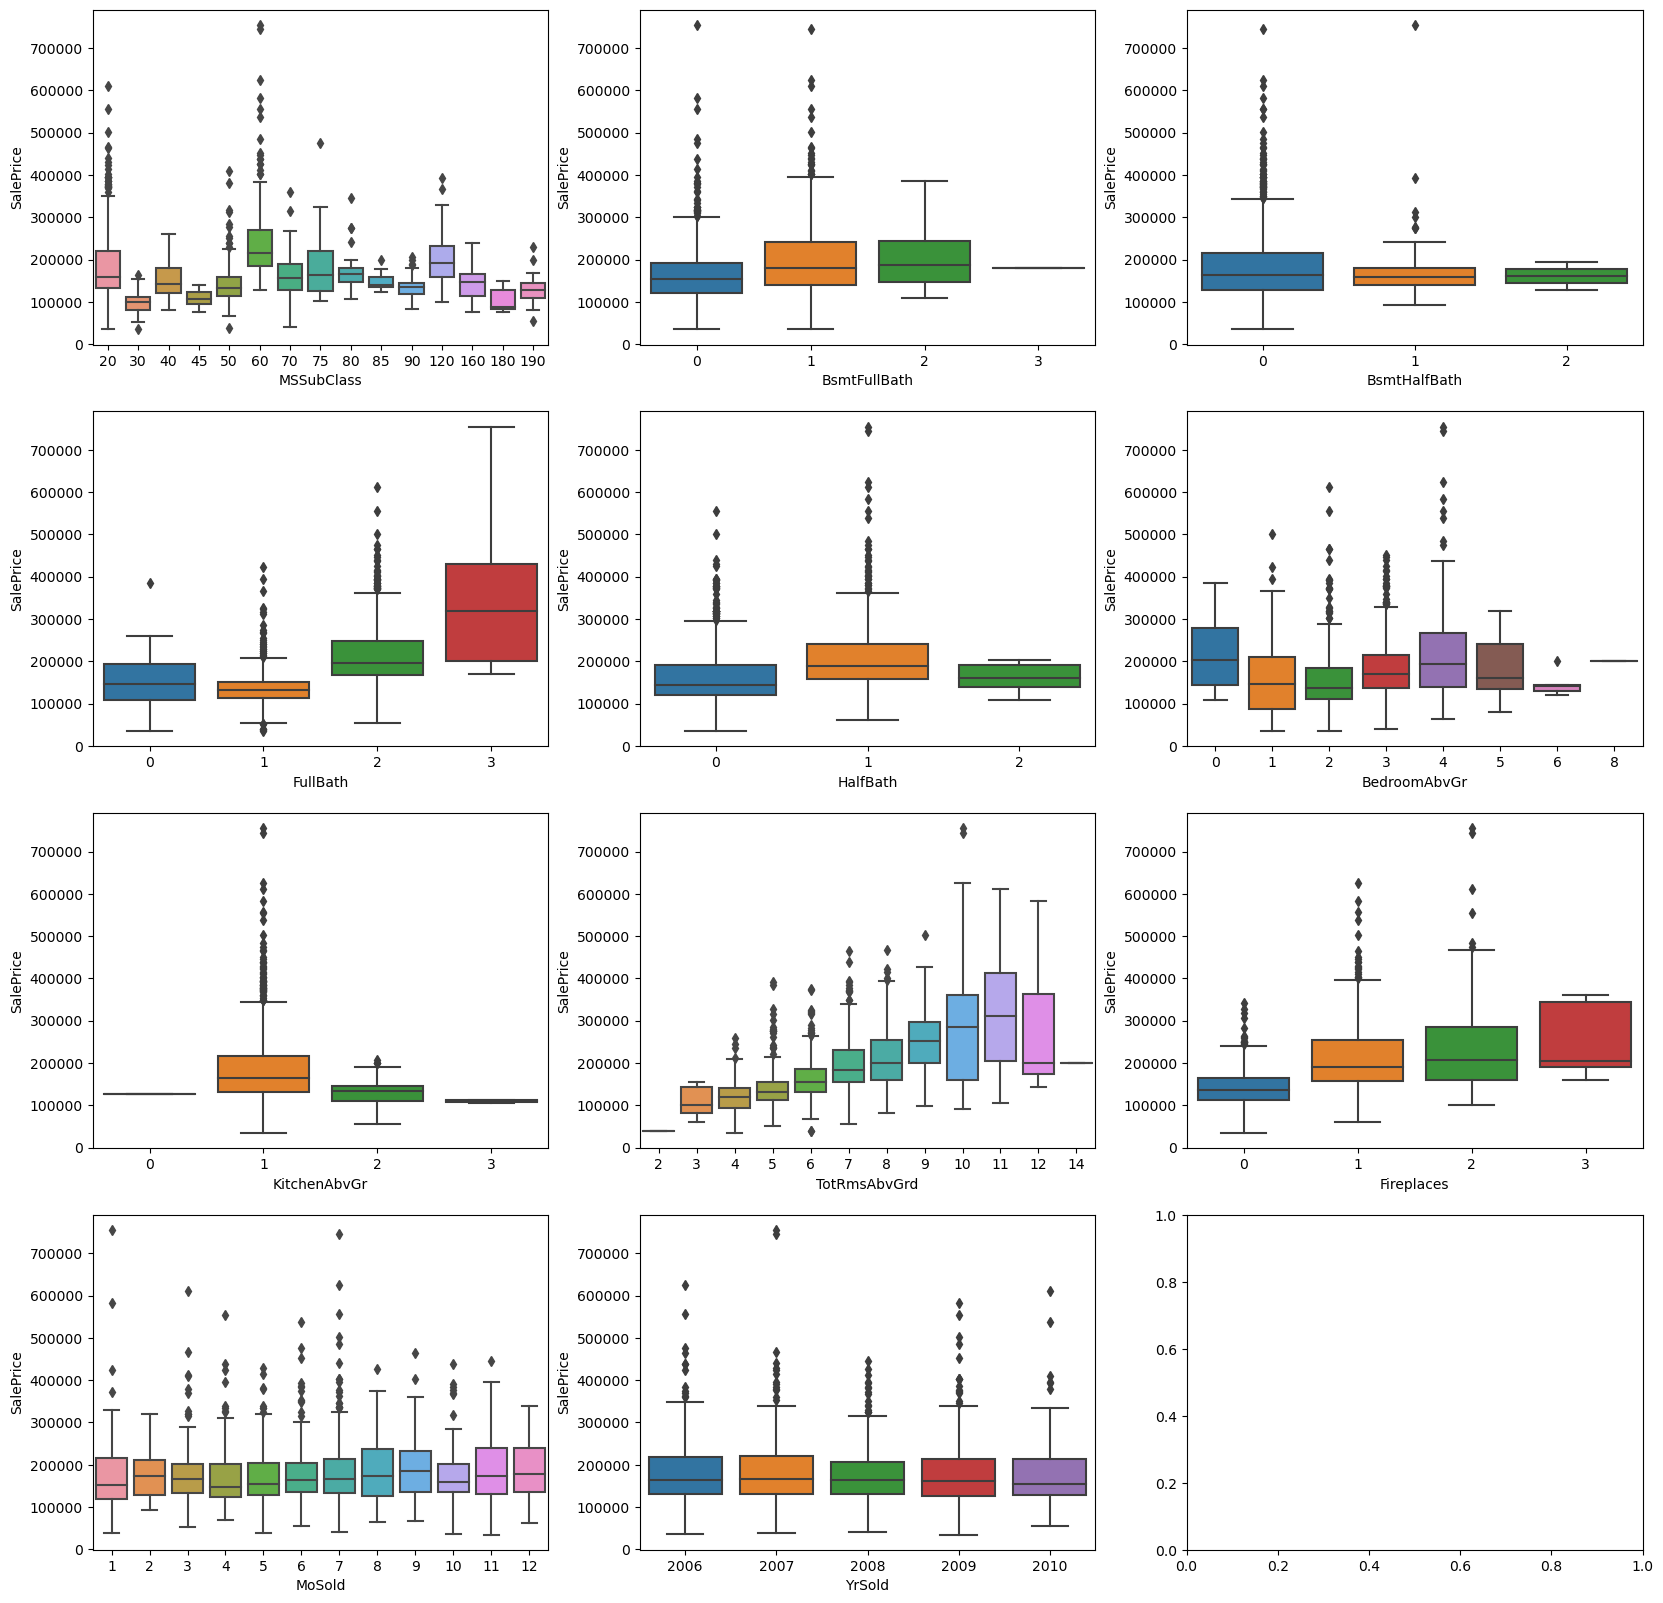

In [241]:
#Check boxplots for numeric variables that could be considered categorical

# Define the number of rows and columns for the grid
rows = 4
cols = 3

# Create a list of all categorical variable names
categorical_vars = ['MSSubClass', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'MoSold', 'YrSold']

# Create a new figure and axis objects
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the categorical variables and create boxplots in the grid
for i, var in enumerate(categorical_vars):
    sns.boxplot(x=var, y='SalePrice', data=house_train, ax=axes[i])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('SalePrice')

In [242]:
# Check for seasonality or trends in date sold
house_train['DateSold'] = None
for i in range(len(house_train)):
    house_train.at[i, 'DateSold'] = datetime(house_train.at[i, 'YrSold'], house_train.at[i, 'MoSold'], 1)

house_train.sort_values(by='DateSold', inplace=True)

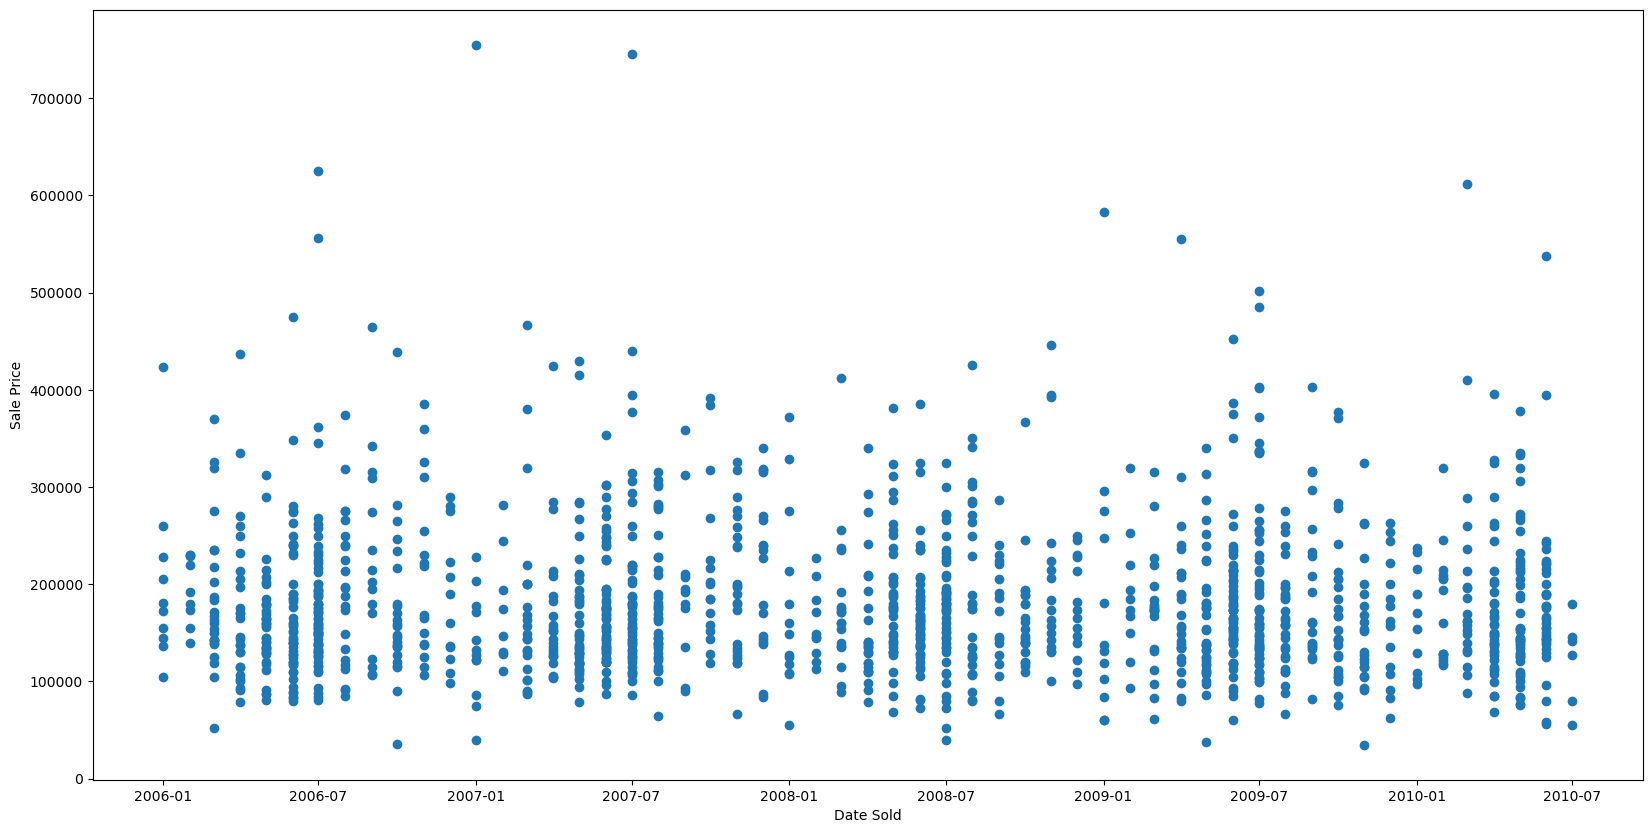

In [243]:
plt.figure(figsize=(20,10)) 
plt.scatter(house_train.DateSold, house_train.SalePrice)
plt.xlabel('Date Sold')
plt.ylabel('Sale Price')
plt.show()

It does not seem like the date sold affects sale price, so let us remove it.

In [244]:
# Delete features that seem to have no correlation with SalePrice
house_train = house_train.drop(columns=['MSSubClass', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 
                                        'BedroomAbvGr', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                                        'MiscVal', 'MoSold', 'YrSold', 'DateSold'])
house_test = house_test.drop(columns=['MSSubClass', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 
                                        'BedroomAbvGr', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                                        'MiscVal', 'MoSold', 'YrSold'])


In [245]:
house_train.columns

Index(['Id', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'FullBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [246]:
house_test.columns

Index(['Id', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'FullBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

This is still too many components. Let us do a Principal Components Analysis to reduce the dimension. This first requires us to scale the data.

In [247]:
def ohe(df, enc_col):
    '''
    This function will one hot encode the specified column and add it back
    onto the input dataframe
    
    params:
        df (DataFrame) : The dataframe you wish for the results to be appended to
        enc_col (String) : The column you want to OHE
    
    returns:
        The OHE columns added onto the input dataframe
    '''
    
    ohe_df = df[enc_col].str.get_dummies()
    ohe_df.reset_index(drop = True, inplace = True)
    del ohe_df[ohe_df.columns[0]] # Remove first column for dummy variable trap

    # Rename redundant columns
    for col in ohe_df.columns.tolist():
        if col in df.columns.tolist():
            i = 2
            while (col + str(i)) in df.columns.tolist():
                i += 1
            ohe_df.rename(columns={col : col + str(i)}, inplace=True)
    return pd.concat([df, ohe_df], axis = 1).drop(columns=[enc_col], axis=1)

In [248]:
# Normalize numeric data using a Standard Scaler
scale = StandardScaler()
house_train_features = house_train.copy().drop(columns=['Id', 'SalePrice'])
house_train_target = house_train.copy().SalePrice
num_vars = house_train_features.select_dtypes(exclude='object').columns.tolist()

house_train_features_scaled = house_train_features.copy()
house_train_features_scaled.loc[:, num_vars] = scale.fit_transform(house_train_features_scaled.loc[:, num_vars])

# One-hot encode the categorical features
categorical_vars = house_train_features.select_dtypes(include='object').columns.tolist()
for var in categorical_vars:
    house_train_features_scaled = ohe(house_train_features_scaled, var)


# Same for test set
house_test_scaled = house_test.copy().drop(columns=['Id'])
house_test_scaled.loc[:, num_vars] = scale.transform(house_test_scaled.loc[:, num_vars])

for var in categorical_vars:
    house_test_scaled = ohe(house_test_scaled, var)

# Insert empty columns that are missing in house_test_scaled
z = 0
for col in house_train_features_scaled.columns.tolist():
    if col not in house_test_scaled.columns.tolist():
        if (z == 0):
            zero_columns = pd.DataFrame(0, index=house_test_scaled.index, columns=[col])
            z += 1
        else:
            if col in zero_columns.columns.tolist():
                print('error')
            zero_columns = pd.concat([zero_columns, pd.DataFrame(0, index=house_test_scaled.index, columns=[col])], axis=1)
house_test_scaled = pd.concat([house_test_scaled, zero_columns], axis=1)

# Make sure train and test sets have same order of columns
house_train_features_scaled = house_train_features_scaled.sort_index(axis=1)
house_test_scaled = house_test_scaled.sort_index(axis=1)

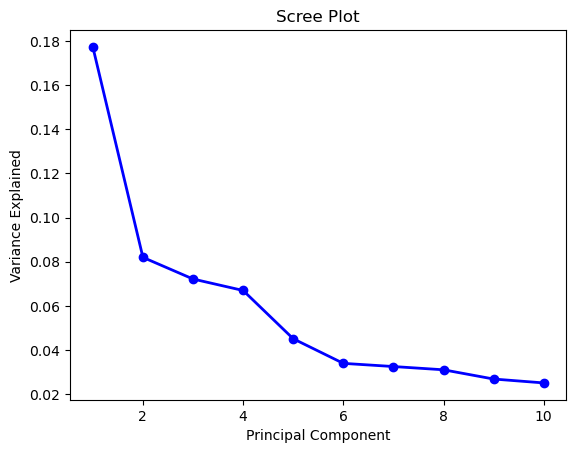

In [249]:
# Create Scree Plot to find best number of components to use in PCA
n = 10
pca = PCA(n_components=n)
principalComponents = pca.fit_transform(house_train_features_scaled)
principalDf = pd.DataFrame(data = principalComponents)

PC_values = np.arange(n) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


Due to the Scree plot and the elbow method, it seems like a good number of principal components to use is 6.

In [250]:
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(house_train_features_scaled)
principalDf = pd.DataFrame(data = principalComponents)
house_train_pca = pd.concat([principalDf, house_train_target], axis = 1)
house_train_pca.head()

,0,1,2,3,4,5,SalePrice
0,-0.140142,1.940099,1.005257,-0.210200,-0.723457,-0.034096,208500
1,-1.712360,2.423350,0.726729,0.535786,0.303519,0.029057,181500
2,3.534565,0.509799,2.730772,-0.840448,-0.678045,-1.099043,223500
3,2.336619,1.120731,0.708858,-0.346823,0.500358,1.666905,140000
4,2.171315,2.424388,0.934743,-1.084245,0.220404,0.521969,250000


In [251]:
house_test_pca = pd.DataFrame(data = pca.transform(house_test_scaled))
house_test_pca.head()

,0,1,2,3,4,5
0,-1.463318,-0.915995,1.400806,-0.083462,-0.044096,0.921982
1,-1.132751,-0.488533,1.859058,0.652297,-0.170899,0.335768
2,0.676208,0.768789,-0.426914,-0.237883,0.472066,-0.489190
3,0.930583,0.936891,-1.011175,0.073849,-0.251086,-0.261096
4,0.248121,1.392478,-0.429462,-2.046898,0.221401,-0.265988


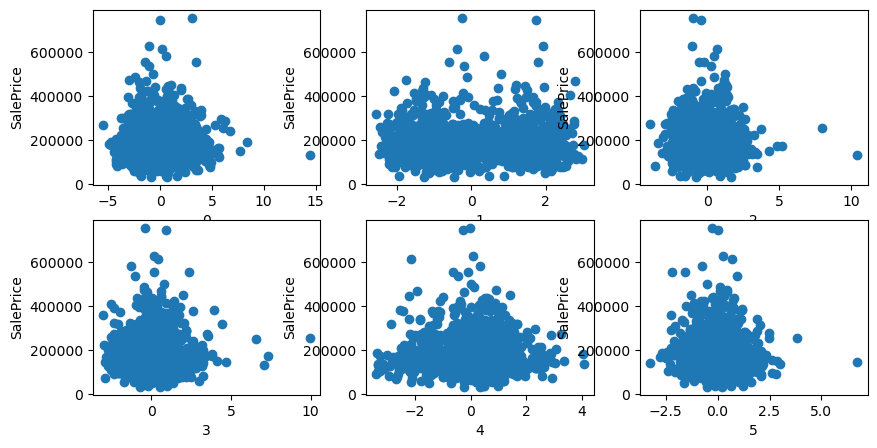

In [252]:
# Visualize the principal components

# Define the number of rows and columns for the grid
rows = 2
cols = 3

# Create a new figure and axis objects
fig, axes = plt.subplots(rows, cols, figsize=(10, 5))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the principal components
for i, var in enumerate(house_train_pca.drop(columns=['SalePrice']).columns.tolist()):
    axes[i].scatter(house_train_pca[var].values, house_train_pca['SalePrice'].values)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('SalePrice')

## Cross-validation

In [253]:
cv = KFold(n_splits=5, shuffle=True, random_state=102)

ml_algorithms = {'Random Forest' : RandomForestRegressor(random_state=400), 
                 'Gradient boosting' : GradientBoostingRegressor(random_state=400),
                 'XGBoost' : xgb.XGBRegressor(random_state=400)}

for name, ml_alg in ml_algorithms.items():

    RMSE = 0

    # Cross-validation
    for i, (train_index, test_index) in enumerate(cv.split(house_train_pca.copy())):

        house_tt = house_train_pca.iloc[train_index]
        house_ho = house_train_pca.iloc[test_index]

        # Fit the model
        ml_alg.fit(house_tt.drop(columns=['SalePrice']), house_tt.SalePrice)
        
        # Create the prediction
        y_pred = ml_alg.predict(house_ho.drop(columns=['SalePrice']))

        RMSE += np.sqrt(mean_squared_error(y_pred, house_ho.SalePrice))

    RMSE = RMSE / 5
    print('RMSE for ', name, ' = ', RMSE)


RMSE for  Random Forest  =  82186.7845120201
RMSE for  Gradient boosting  =  81788.40736166423
RMSE for  XGBoost  =  89681.81059621363


It looks like Gradient Boosting is the way to go!

In [254]:
gbr = GradientBoostingRegressor(random_state=400)
gbr.fit(house_train_pca.drop(columns=['SalePrice']), house_train_pca.SalePrice)
y_pred = gbr.predict(house_test_pca)

submission_df = pd.DataFrame({'Id' : house_test.Id, 'SalePrice' : y_pred})

In [256]:
submission_df.to_csv('submission.csv', index=False)